In [86]:
#1. Importing Libraries
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
# Numerical libraries
import numpy as np   
from sklearn.cluster import KMeans
import seaborn as sns
import warnings
# to handle data in form of rows and columns 
import pandas as pd    
# importing ploting libraries
import matplotlib.pyplot as plt   
from sklearn import metrics
from scipy.stats import zscore 
#from google.colab import files
from sklearn.cluster import KMeans

from scipy.stats import zscore 
from sklearn.linear_model import LogisticRegression   #for linear regression

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

In [87]:
# reading the CSV file into pandas dataframe

data = pd.read_csv('cars-dataset.csv') 
data.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [89]:
data.drop(['car name'],axis=1,inplace=True)
data.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130,3504,12.0,70,18.0
1,8,350.0,165,3693,11.5,70,15.0
2,8,318.0,150,3436,11.0,70,18.0
3,8,304.0,150,3433,12.0,70,16.0
4,8,302.0,140,3449,10.5,70,17.0


In [90]:
#Checking Null
data.isnull().sum()

cyl     0
disp    0
hp      0
wt      0
acc     0
yr      0
mpg     0
dtype: int64

In [91]:
data['hp'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [92]:
data.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [93]:
for feature in data.columns: # Loop through all columns in the dataframe
    if data[feature].dtype == 'object': # Only apply for columns with categorical strings
        data[feature] = pd.Categorical(data[feature]).codes # Replace strings with an integer

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
cyl     398 non-null int64
disp    398 non-null float64
hp      398 non-null int8
wt      398 non-null int64
acc     398 non-null float64
yr      398 non-null int64
mpg     398 non-null float64
dtypes: float64(3), int64(3), int8(1)
memory usage: 19.1 KB


In [95]:
data.corr()

,cyl,disp,hp,wt,acc,yr,mpg
cyl,1.000000,0.950721,-0.575603,0.896017,-0.505419,-0.348746,-0.775396
disp,0.950721,1.000000,-0.511171,0.932824,-0.543684,-0.370164,-0.804203
hp,-0.575603,-0.511171,1.000000,-0.510286,0.288633,0.146147,0.451767
wt,0.896017,0.932824,-0.510286,1.000000,-0.417457,-0.306564,-0.831741
acc,-0.505419,-0.543684,0.288633,-0.417457,1.000000,0.288137,0.420289
yr,-0.348746,-0.370164,0.146147,-0.306564,0.288137,1.000000,0.579267
mpg,-0.775396,-0.804203,0.451767,-0.831741,0.420289,0.579267,1.000000


In [96]:
#observing a high correlation of cylinders with displacement and horsepower

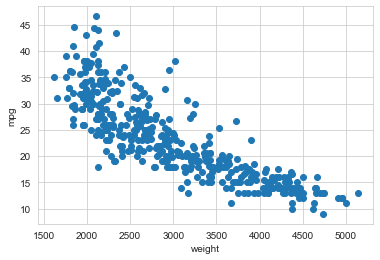

In [97]:
plt.scatter(x=data['wt'], y=data['mpg'])
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

#MPG is decreased

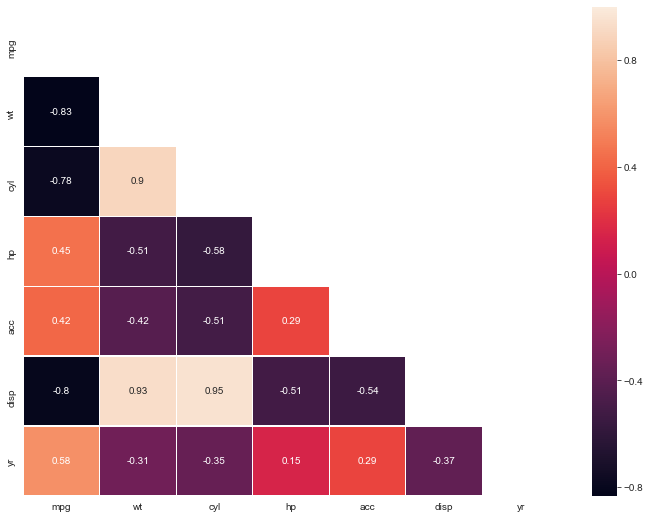

In [98]:
#Heatmap
factors = ['mpg', 'wt', 'cyl', 'hp','acc', 'disp', 'yr']
corrmat = data[factors].corr()
import seaborn as sns
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, linewidths=.25, annot=True, mask=mask);

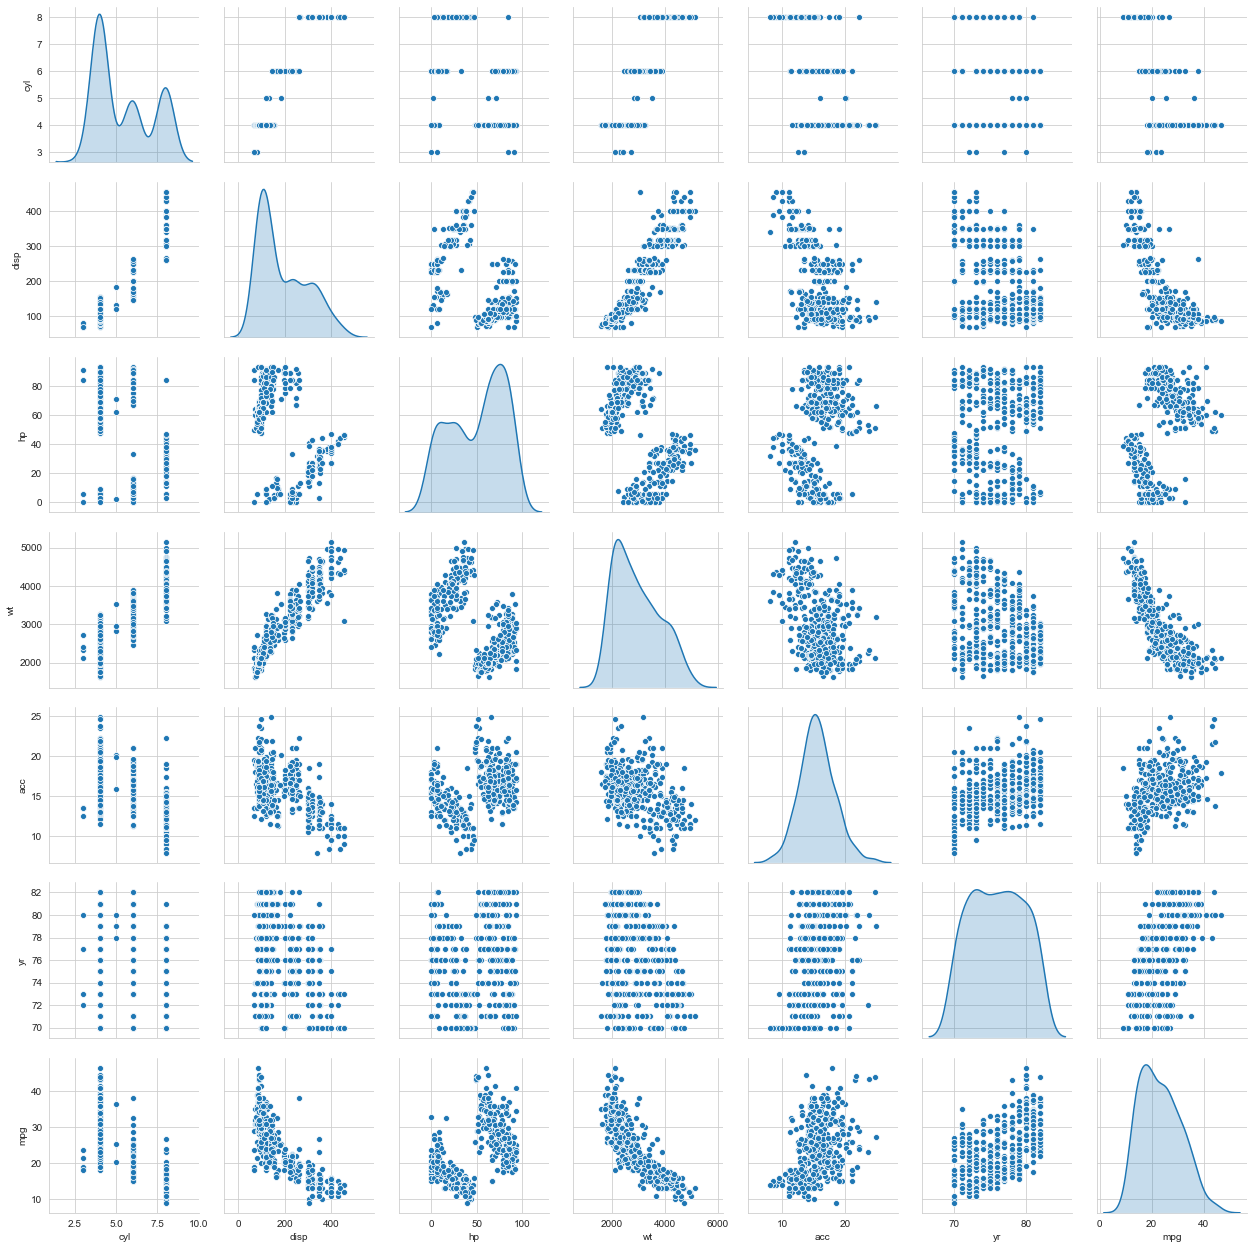

In [99]:
#pair plot 
import seaborn as sns
sns.set_style("whitegrid")
sns.pairplot(data,diag_kind='kde');

There are 3 gaussian curve observations

In [100]:
data.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,15,3504,12.0,70,18.0
1,8,350.0,33,3693,11.5,70,15.0
2,8,318.0,27,3436,11.0,70,18.0
3,8,304.0,27,3433,12.0,70,16.0
4,8,302.0,22,3449,10.5,70,17.0


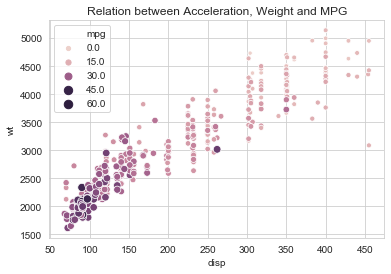

In [101]:
sns.scatterplot(x='disp', y='wt',size='mpg', hue='mpg', data=data)
plt.title('Relation between Acceleration, Weight and MPG')
plt.show()

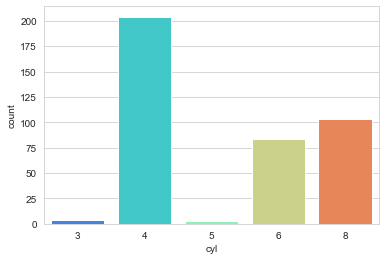

In [102]:
sns.countplot(data.cyl,data=data,palette = "rainbow")
plt.show()

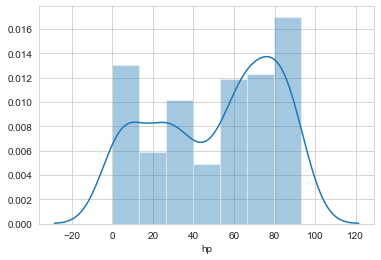

In [103]:
sns.distplot(data['hp'])
plt.show()

#Most of the vehicles have around 75-110 horsepower and only few vehicles have horsepower above 200.

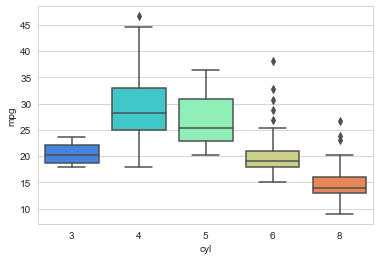

In [104]:
## multivariate analysis
sns.boxplot(y='mpg',x='cyl',data=data,palette = "rainbow")
plt.show()

The inference that for most of the people mileage(mpg) is one of the major factor while buying a vehicle.

In [105]:
from scipy import stats
# standardizing the data
# standardizing the data
data_scaled = pd.DataFrame(stats.zscore(data),columns=['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg'])

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,cyl,disp,hp,wt,acc,yr,mpg
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,-5.171742e-16,-8.312725e-17,6.750602e-17,-9.902743e-17,8.982206e-17,-8.837152e-16,2.761610e-16
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-1.444949e+00,-1.204411e+00,-1.710667e+00,-1.604943e+00,-2.747814e+00,-1.627426e+00,-1.859374e+00
25%,-8.563206e-01,-8.563178e-01,-8.268237e-01,-8.828266e-01,-6.328794e-01,-8.150739e-01,-7.704907e-01
50%,-8.563206e-01,-4.314040e-01,3.095460e-01,-1.973624e-01,-2.472221e-02,-2.721449e-03,-6.591883e-02
75%,1.498191e+00,6.584879e-01,9.156098e-01,7.538337e-01,5.834349e-01,8.096310e-01,7.027050e-01
max,1.498191e+00,2.511784e+00,1.420663e+00,2.565185e+00,3.351912e+00,1.621983e+00,2.957335e+00


In [106]:
# KMeans Clustring Algorithm
# Label, Intertia and Centroid
cluster_range = range(1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
#cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(data_scaled)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,2786.000000
1,2,1344.297193
2,3,1070.487125
3,4,827.567647
4,5,716.465213
5,6,653.802125
6,7,602.164171
7,8,542.695997
8,9,501.992503


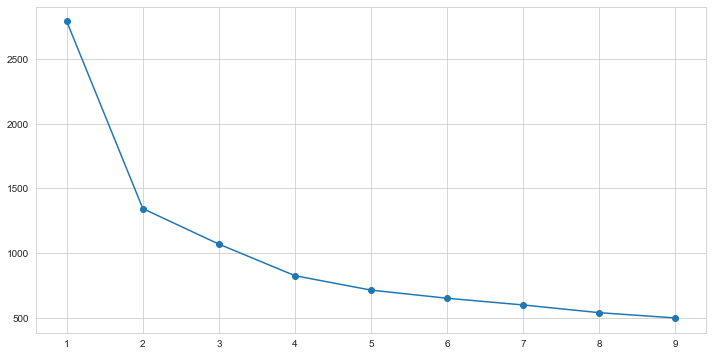

In [107]:
# Elbow plot to identify number of clusters

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [108]:
# Number of clusters

kmeans = KMeans(n_clusters=3)

# Fitting the input data

kmeans = kmeans.fit(data_scaled)

# Getting the cluster labels

labels = kmeans.predict(data_scaled)

# Centroid values

centroids = kmeans.cluster_centers_

# Comparing with scikit-learn centroids

print("Centroid values")

print("sklearn")

print(centroids) # From sci-kit learn

Centroid values
sklearn
[[ 1.4860546   1.48638807 -0.69708921  1.38380387 -1.05856129 -0.66432806
  -1.15070857]
 [-0.69109167 -0.67405848  0.76689971 -0.6683659   0.44122904  0.26212444
   0.61960599]
 [ 0.1838576   0.13021493 -1.46897917  0.24874587  0.02849621  0.06404724
  -0.40618404]]


In [109]:
X_df = pd.DataFrame(data_scaled)
X_df["group"] = labels
X_df.head(10)

,cyl,disp,hp,wt,acc,yr,mpg,group
0,1.498191,1.090604,-1.205614,0.630870,-1.295498,-1.627426,-0.706439,0
1,1.498191,1.503514,-0.599550,0.854333,-1.477038,-1.627426,-1.090751,0
2,1.498191,1.196232,-0.801571,0.550470,-1.658577,-1.627426,-0.706439,0
3,1.498191,1.061796,-0.801571,0.546923,-1.295498,-1.627426,-0.962647,0
4,1.498191,1.042591,-0.969922,0.565841,-1.840117,-1.627426,-0.834543,0
5,1.498191,2.262118,-0.363858,1.620492,-2.021656,-1.627426,-1.090751,0
6,1.498191,2.502182,-0.195507,1.635863,-2.384735,-1.627426,-1.218855,0
7,1.498191,2.367746,-0.229177,1.586204,-2.566274,-1.627426,-1.218855,0
8,1.498191,2.511784,-0.161837,1.719809,-2.021656,-1.627426,-1.218855,0
9,1.498191,1.887617,-0.431199,1.039961,-2.566274,-1.627426,-1.090751,0


In [110]:
# Count the number of records per group to check the group symmetry 
df=X_df["group"].value_counts()
df

1    228
0     97
2     73
Name: group, dtype: int64

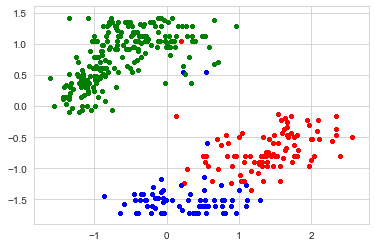

In [111]:

colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
c = np.array([3,3])

for i in labels:
        points = np.array(X_df.loc[X_df['group'] == i])
        #c[i] = np.mean(points, axis=0)
        ax.scatter(points[:, 3], points[:, 2], s=7, c=colors[i])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a237f7c50>,
      dtype=object)

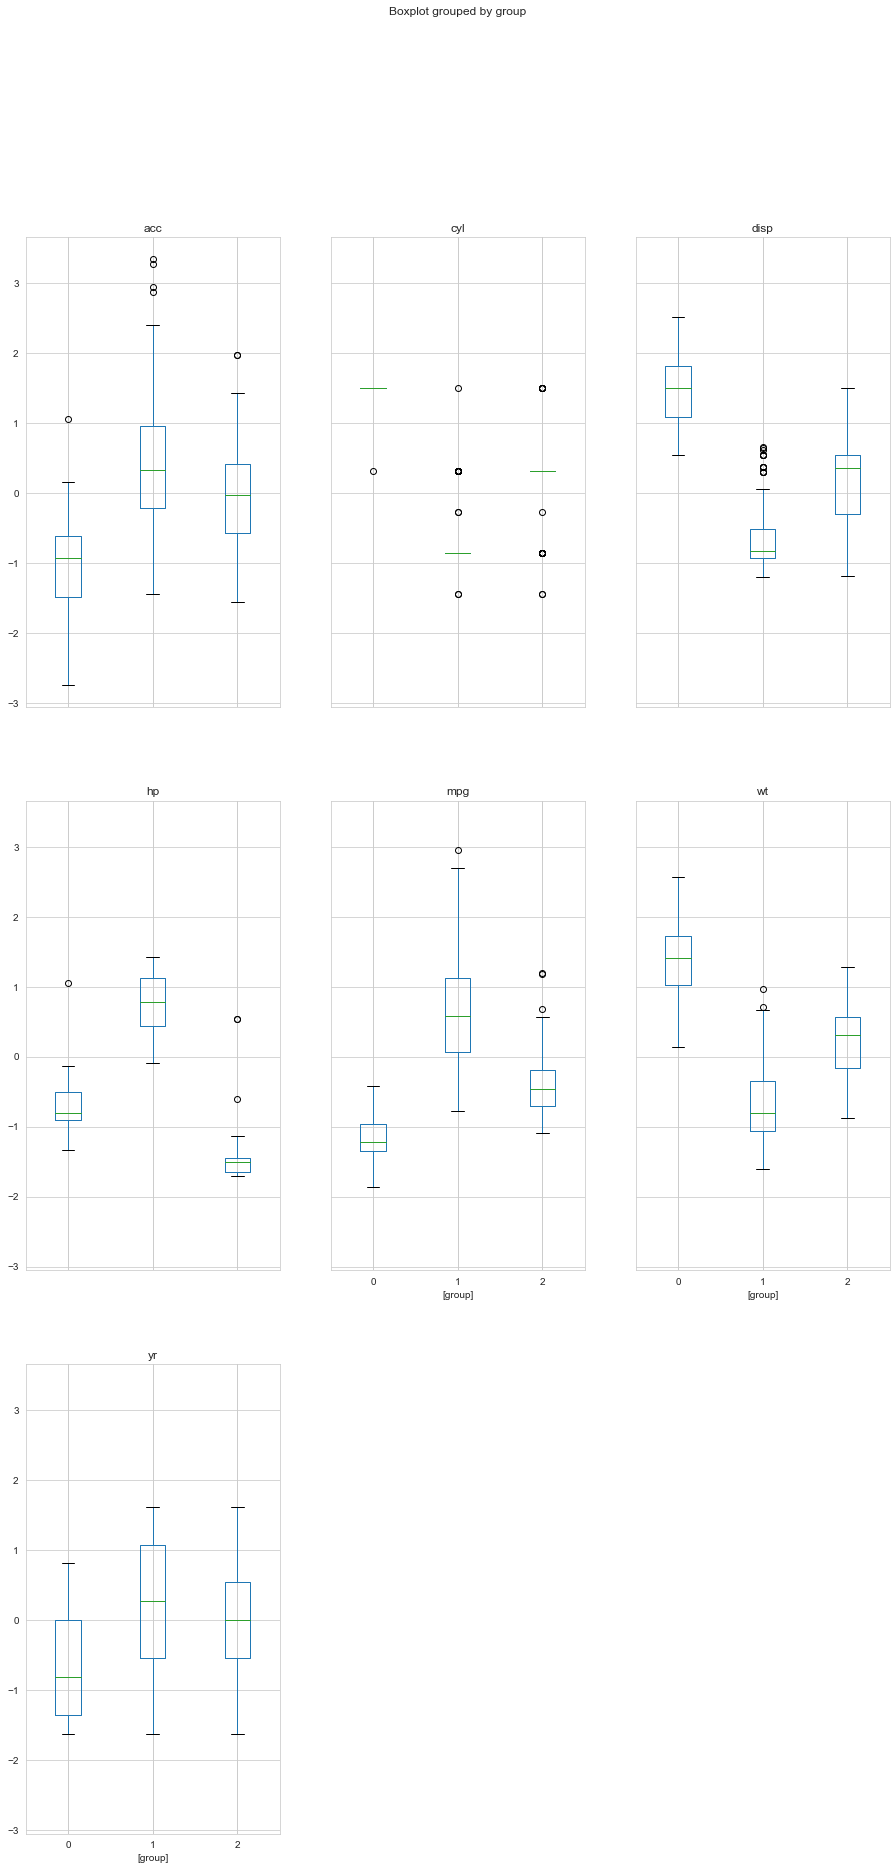

In [112]:
import matplotlib.pylab as plt

X_df.boxplot(by = 'group',  layout=(4,3), figsize=(15, 40))


Use linear regression model on different clusters separately and print the coefficients of the models individually 

Creating three different clusters by group for linear regression

In [113]:

df_0 = X_df[X_df['group'] == 0] 
df_0.shape
df_0.head()

,cyl,disp,hp,wt,acc,yr,mpg,group
0,1.498191,1.090604,-1.205614,0.630870,-1.295498,-1.627426,-0.706439,0
1,1.498191,1.503514,-0.599550,0.854333,-1.477038,-1.627426,-1.090751,0
2,1.498191,1.196232,-0.801571,0.550470,-1.658577,-1.627426,-0.706439,0
3,1.498191,1.061796,-0.801571,0.546923,-1.295498,-1.627426,-0.962647,0
4,1.498191,1.042591,-0.969922,0.565841,-1.840117,-1.627426,-0.834543,0


In [114]:
df_1 = X_df[X_df['group'] == 1] 
df_1.shape

(228, 8)

In [115]:
df_2 = X_df[X_df['group'] == 2] 
df_2.shape

(73, 8)

Creating 3 data frame and dropping group from them

In [116]:
df0 = df_0.drop('group', axis=1)

In [117]:
df1 = df_1.drop('group', axis=1)

In [118]:
df2 = df_2.drop('group', axis=1)

#Group 0 dataset linear regression

In [119]:

X = df0.drop('mpg', axis=1)
y = df0[['mpg']]

from sklearn.model_selection import train_test_split

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [120]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [121]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is -0.6363566753884843
The coefficient for disp is -0.04826850834679641
The coefficient for hp is -0.1541280875093985
The coefficient for wt is -0.13756381989665364
The coefficient for acc is -0.16225968200589094
The coefficient for yr is 0.1863802924826504


In [122]:
#score method
regression_model.score(X_test, y_test)

0.5201937219616575

In [123]:
#MSE
from sklearn.metrics import mean_squared_error

y_predict = regression_model.predict(X_test)

regression_model_mse = mean_squared_error(y_predict, y_test)

regression_model_mse

0.042759304399833206

In [124]:
import math

math.sqrt(regression_model_mse)

0.20678323046086983

#Group 1 dataset linear regression

In [125]:

X = df1.drop('mpg', axis=1)
y = df1[['mpg']]

from sklearn.model_selection import train_test_split

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [126]:
from sklearn.linear_model import LinearRegression

regression_model1 = LinearRegression()
regression_model1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [127]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model1.coef_[0][idx]))

The coefficient for cyl is 0.3560855880507863
The coefficient for disp is -0.586421629690592
The coefficient for hp is -0.29580318840091463
The coefficient for wt is -0.63623061683677
The coefficient for acc is 0.016818035634014777
The coefficient for yr is 0.4395496663794481


In [128]:
#score method
regression_model1.score(X_test, y_test)

0.6851240486928513

In [129]:
#MSE
y_predict = regression_model1.predict(X_test)

regression_model_mse1 = mean_squared_error(y_predict, y_test)

regression_model_mse1

0.204330060075863

In [130]:
import math

math.sqrt(regression_model_mse1)

0.4520288265983299

#Group 2 dataset linear regression

In [131]:

X = df2.drop('mpg', axis=1)
y = df2[['mpg']]

from sklearn.model_selection import train_test_split

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [132]:
from sklearn.linear_model import LinearRegression

regression_model2 = LinearRegression()
regression_model2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [133]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model2.coef_[0][idx]))

The coefficient for cyl is -0.07996540755803044
The coefficient for disp is 0.09046897208777892
The coefficient for hp is -0.15743477424935526
The coefficient for wt is -0.3641820426893158
The coefficient for acc is -0.15015750119882693
The coefficient for yr is 0.33685978531045035


In [134]:
regression_model2.score(X_test, y_test)

0.5700978999561136

In [135]:
#MSE
y_predict = regression_model2.predict(X_test)

regression_model_mse2 = mean_squared_error(y_predict, y_test)

regression_model_mse2

0.06602703248531565

In [136]:
import math

math.sqrt(regression_model_mse2)

0.2569572580903596

#Hierarchical clustering

In [137]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
%matplotlib inline
from sklearn.preprocessing import normalize
data_scaled1 = normalize(data)
data["hp"] =pd.Categorical(data["hp"]).codes
X = pd.DataFrame(data)
X.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,15,3504,12.0,70,18.0
1,8,350.0,33,3693,11.5,70,15.0
2,8,318.0,27,3436,11.0,70,18.0
3,8,304.0,27,3433,12.0,70,16.0
4,8,302.0,22,3449,10.5,70,17.0


In [138]:
#cdist distance between the cluster
#pdist distance inside the cluster
# Case 1: Ward Method
Z = linkage(X, 'ward')
c, coph_dists = cophenet(Z , pdist(X))
print("Ward",c)
# Case 2: Average Linkage
Z = linkage(X, 'average')
c, coph_dists = cophenet(Z , pdist(X))
print("Average", c)
# Case 3: Complete Linkage
Z = linkage(X, 'complete')
c, coph_dists = cophenet(Z , pdist(X))
print("Complete",c)

Ward 0.7571726158246246
Average 0.7571591640253414
Complete 0.761136481782031


In [139]:
# Case 3: Complete Linkage
Z = linkage(X, 'complete')
c, coph_dists = cophenet(Z , pdist(X))
print("Complete",c)

Complete 0.761136481782031


In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='complete'))

In [ ]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='complete'))
plt.axhline(y=0.6, color='g', linestyle='--')
plt.axhline(y=0.7, color='r', linestyle='-.')
plt.axhline(y=0.8, color='b', linestyle='--')
plt.axhline(y=0.9, color='y', linestyle='-.')
plt.axhline(y=1.2, color='b', linestyle='-')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')  
cluster.fit_predict(X)

In [ ]:
X['labels'] = cluster.labels_
X.groupby(["labels"]).count()


In [ ]:
Cluster = X.groupby(['labels'])
Cluster

In [ ]:
Group=Cluster.head(398)
Group.shape


In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(data['disp'], data['wt'], c=cluster.labels_) 

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(data['disp'], data['cyl'], c=cluster.labels_) 

In [ ]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'), p=12, truncate_mode='lastp')